In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

iris = pd.read_csv("iris.csv",header = None)


In [25]:
dataset = iris.copy()

In [26]:
dataset.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [27]:
dataset.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object

In [28]:


dataset.species.unique()  # So we have 3 different species of iris flower.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:

dataset.shape # Gives the number of rows and columns of dataset.


(150, 5)

In [30]:

dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:

dataset.isnull().sum()


sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [32]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<Axes: >

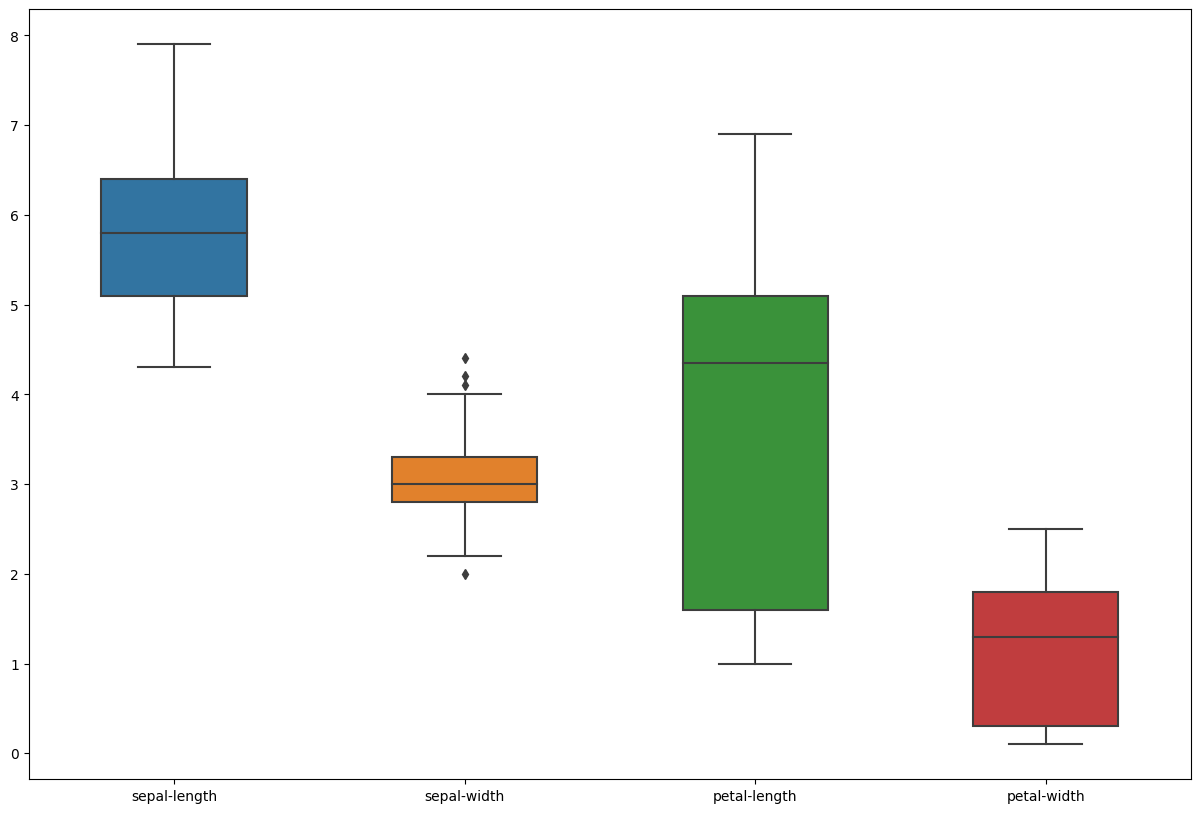

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width= 0.5, ax=ax)


<Axes: xlabel='species', ylabel='petal-width'>

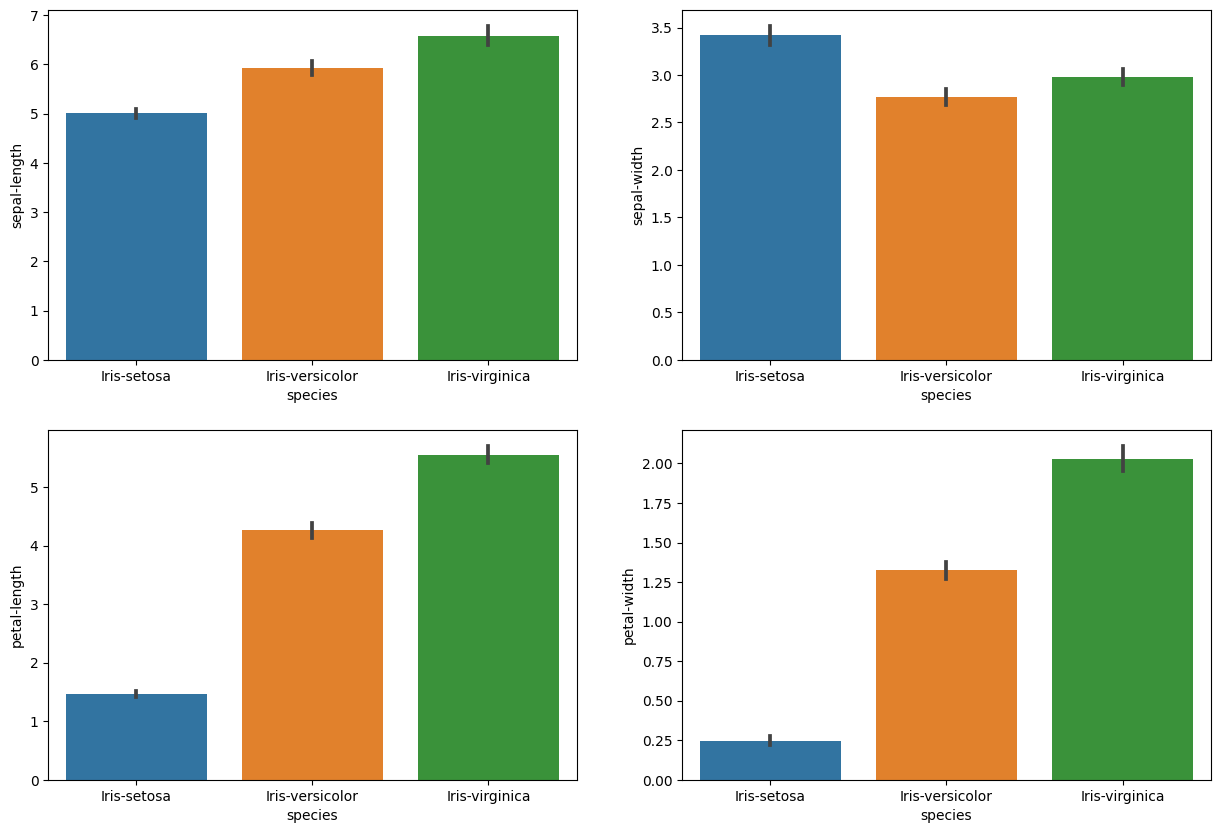

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'species', y = 'sepal-length', data=dataset)
plt.subplot(2,2,2)
sns.barplot(x = 'species', y = 'sepal-width', data=dataset)
plt.subplot(2,2,3)
sns.barplot(x = 'species', y = 'petal-length', data=dataset)
plt.subplot(2,2,4)
sns.barplot(x = 'species', y = 'petal-width', data=dataset)


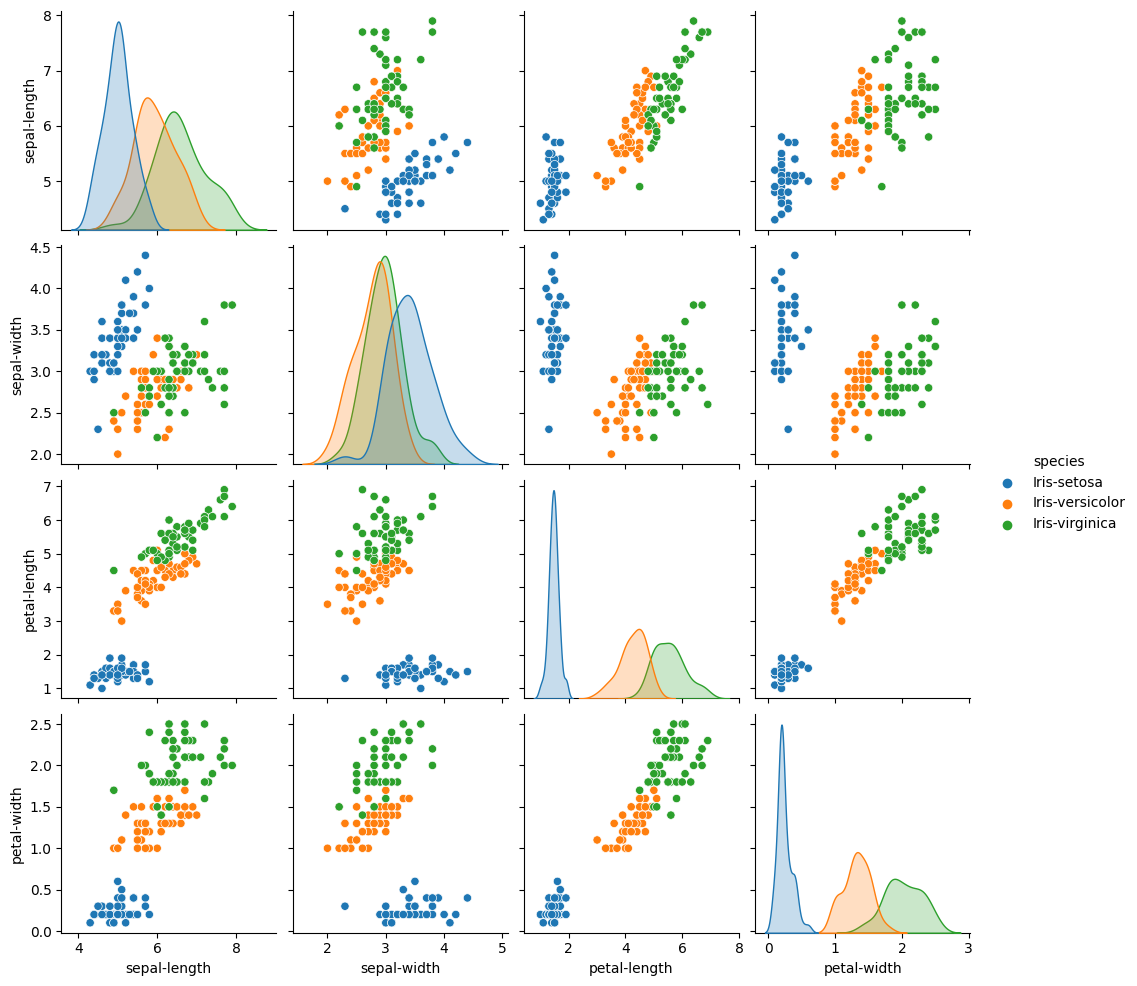

In [35]:

#Pairplot
sns.pairplot(dataset,hue='species')


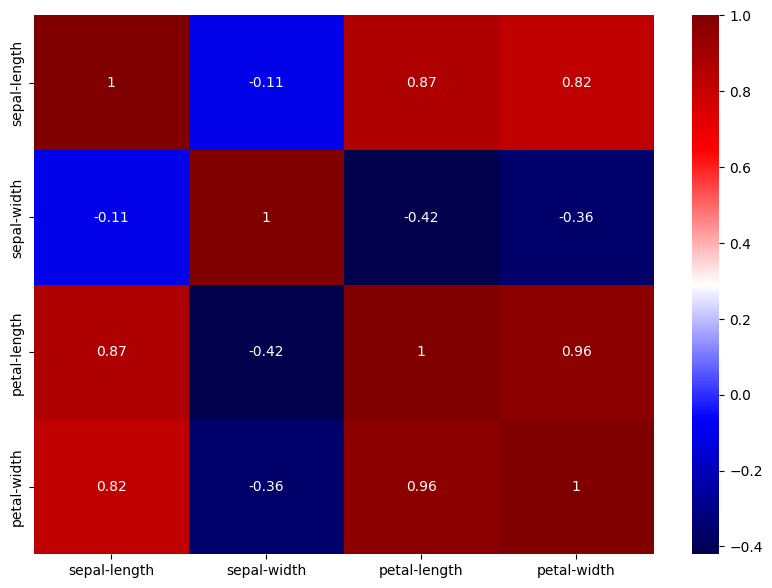

In [36]:

#Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(numeric_only=True),annot=True,cmap="seismic")
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()  # It is used to normalize labels.



In [38]:
dataset['species'] = l.fit_transform(dataset['species'])  #fit_transform: Fit label encoder and return encoded labels.
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
X_train = dataset.drop('species', axis=1)
Y_train = dataset['species']

In [40]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt=dt.fit(x_train, y_train)


In [42]:
from sklearn.metrics import accuracy_score
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))


Training Accuracy is:  100.0


In [43]:

act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))


Test Accuracy is:  97.77777777777777


[Text(0.4, 0.9166666666666666, 'x[2] <= 2.35\nentropy = 1.582\nsamples = 105\nvalue = [33, 34, 38]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.75\nentropy = 0.998\nsamples = 72\nvalue = [0, 34, 38]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'x[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.0\nentrop

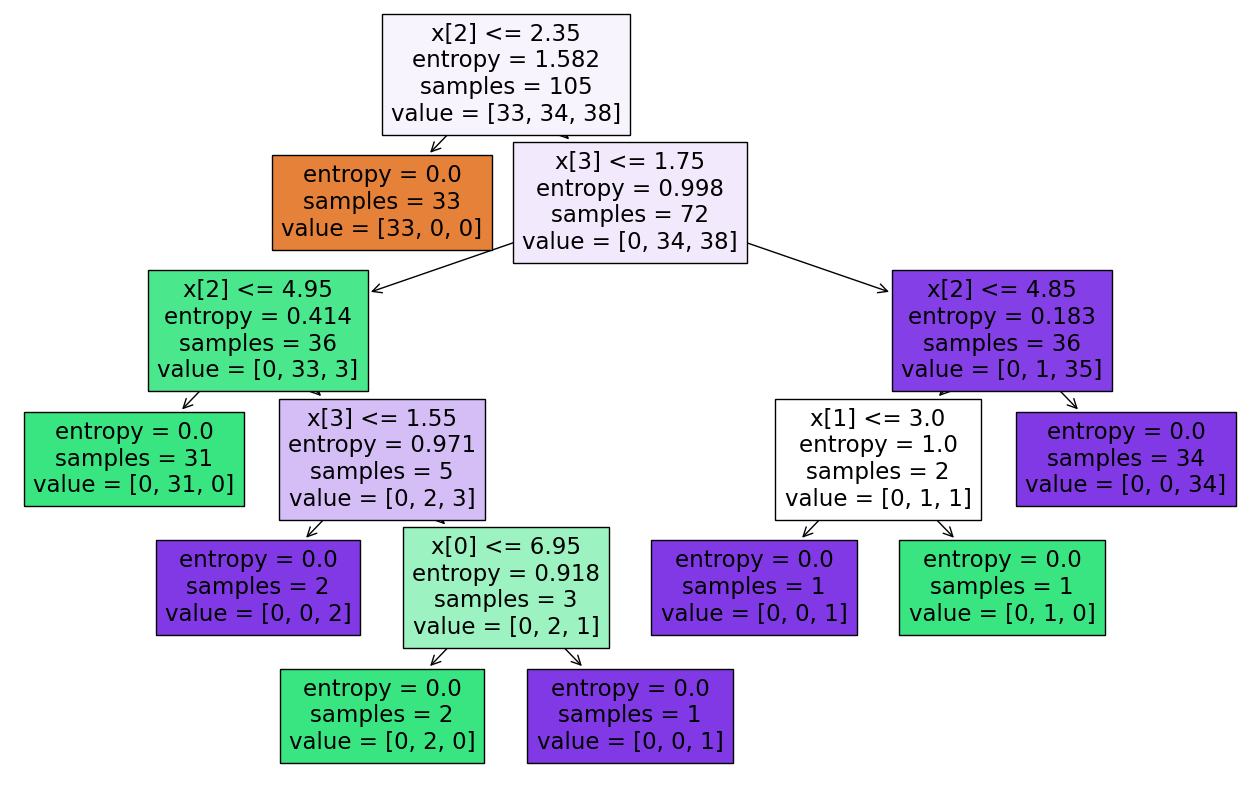

In [44]:

from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt,filled=True)